# Dimensionality Reduction  in HSI

### code below shows how dimensions are reduced 

#### Imported required libraries for the dataset

In [1]:
import numpy as np # linear algebra
import pandas as pd

####  The HSI dataset we have taken is the "Indian Pines " , the dataset is .npy file gathered from KAGGLE


In [2]:
salinas = np.load('salinas_corrected.npy') # training Dataset wd input values
ground_truth = np.load('salinas_gt.npy') # Dataset with output column

#### For processing the hyper spectral image data we are using  python  module  "Spectral" 

In [3]:
!pip install spectral

#### Importing the spectral module

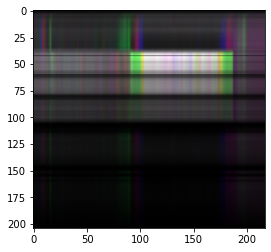

In [4]:
import spectral as sp
view = sp.imshow(salinas, (204, 217, 200))

#### "Shape"  is used to show no of elements per axis(Dimensions)

In [5]:
salinas.shape

(204, 217, 512)

In [6]:
salinas

array([[[290, 379, 369, ..., 379, 314, 371],
        [290, 308, 298, ..., 308, 314, 299],
        [290, 379, 298, ..., 379, 385, 299],
        ...,
        [373, 376, 447, ..., 367, 367, 447],
        [373, 376, 305, ..., 367, 367, 447],
        [305, 305, 447, ..., 438, 376, 376]],

       [[381, 400, 495, ..., 383, 479, 400],
        [381, 400, 411, ..., 383, 396, 483],
        [381, 483, 411, ..., 383, 396, 400],
        ...,
        [482, 477, 468, ..., 387, 387, 405],
        [482, 477, 468, ..., 470, 470, 405],
        [393, 393, 384, ..., 470, 489, 489]],

       [[585, 600, 604, ..., 540, 604, 605],
        [519, 535, 604, ..., 540, 539, 605],
        [585, 535, 670, ..., 540, 539, 540],
        ...,
        [594, 590, 664, ..., 661, 661, 674],
        [659, 590, 664, ..., 661, 661, 674],
        [655, 655, 664, ..., 596, 674, 674]],

       ...,

       [[ 36,  32,  29, ...,   6,   8,   1],
        [ 36,  28,  23, ...,   8,   4,  11],
        [ 30,  26,  27, ...,   4,   2,  11

#### Image display

ImageView object:
  Display bands       :  (204, 217, 0)
  Interpolation       :  <default>
  RGB data limits     :
    R: [-5.0, 7976.0]
    G: [-5.0, 8234.0]
    B: [-7.0, 7603.0]

ImageView object:
  Display bands       :  (204, 217, 1)
  Interpolation       :  <default>
  RGB data limits     :
    R: [-5.0, 7976.0]
    G: [-5.0, 8234.0]
    B: [-7.0, 7609.0]

ImageView object:
  Display bands       :  (204, 217, 2)
  Interpolation       :  <default>
  RGB data limits     :
    R: [-5.0, 7976.0]
    G: [-5.0, 8234.0]
    B: [-5.0, 7590.0]

ImageView object:
  Display bands       :  (204, 217, 3)
  Interpolation       :  <default>
  RGB data limits     :
    R: [-5.0, 7976.0]
    G: [-5.0, 8234.0]
    B: [-6.0, 7573.0]

ImageView object:
  Display bands       :  (204, 217, 4)
  Interpolation       :  <default>
  RGB data limits     :
    R: [-5.0, 7976.0]
    G: [-5.0, 8234.0]
    B: [-4.0, 7487.0]

ImageView object:
  Display bands       :  (204, 217, 5)
  Interpolation       :  <de

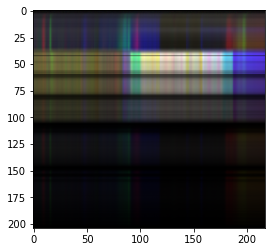

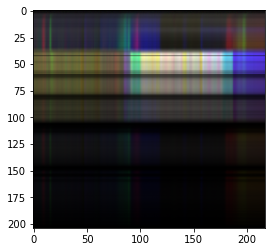

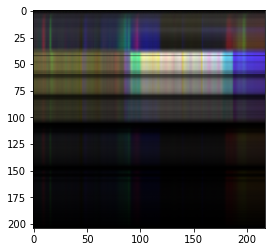

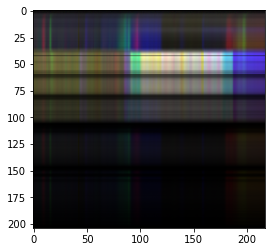

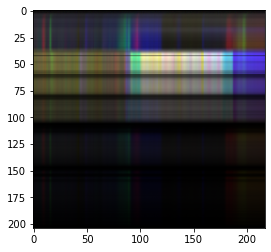

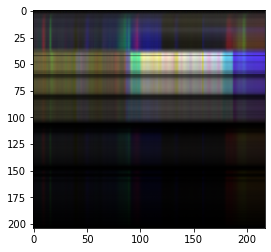

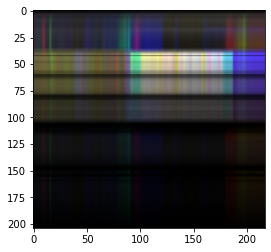

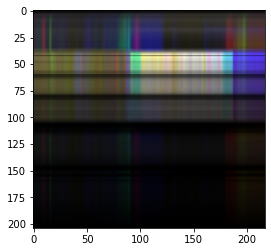

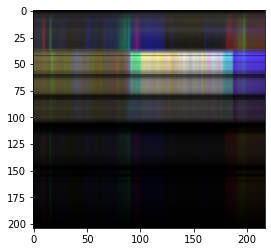

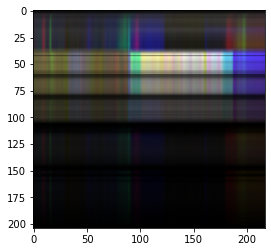

In [7]:
for i in range(10):
    view = sp.imshow(salinas, (204, 217, i))
    print(view)

In [8]:
ground_truth.shape

(217, 512)

In [9]:
print(ground_truth)

[[ 0  0  0 ... 16 16  0]
 [ 0  0  0 ... 16 16  0]
 [ 0  0  0 ... 16 16  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


#### using "matplotlib"

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


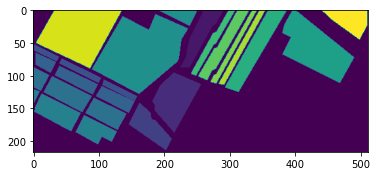

In [10]:
import matplotlib.pyplot as plt
plt.imshow(ground_truth)
print(np.unique(ground_truth)) 

#### Reshaped the dataset arrays and stored in variables

In [11]:
flattened_image = salinas.reshape(111104,204)
flattened_ground = np.reshape(ground_truth,(-1,))

In [12]:
flattened_image.shape

(111104, 204)

In [13]:
flattened_ground.shape

(111104,)

In [14]:
#len(flattened_image)
len(flattened_ground)


111104

### 1. Principle Component Analysis (PCA)

In [15]:
''' Principal Component Analysis (PCA) is a statistical procedure that uses an orthogonal transformation which converts a set of 
correlated variables to a set of uncorrelated variables. PCA is a most widely used tool in exploratory data analysis and in 
machine learning for predictive models. '''
# https://media.geeksforgeeks.org/wp-content/uploads/m.png

' Principal Component Analysis (PCA) is a statistical procedure that uses an orthogonal transformation which converts a set of \ncorrelated variables to a set of uncorrelated variables. PCA is a most widely used tool in exploratory data analysis and in \nmachine learning for predictive models. '

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [17]:
pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=10))])
pca_image = pipeline.fit_transform(flattened_image)

ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [-23.67492429449863, 48.00670277302859]
    G: [-23.67492429449863, 48.00670277302859]
    B: [-23.67492429449863, 48.00670277302859]

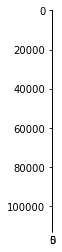

In [18]:
sp.imshow(pca_image)

In [19]:
pca_image.shape

(111104, 10)

In [20]:
pca=np.reshape(pca_image,(217,512,pca_image.shape[-1]))

In [21]:
pca.shape

(217, 512, 10)

ImageView object:
  Display bands       :  [0, 5.0, 9]
  Interpolation       :  <default>
  RGB data limits     :
    R: [-15.489222072691799, 48.00670277302859]
    G: [-15.58828492743121, 16.090734428971057]
    B: [-7.177619713474068, 7.275539767161048]

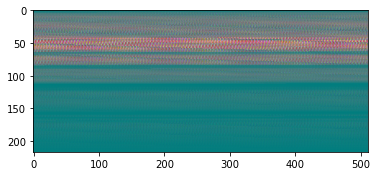

In [22]:
sp.imshow(pca)

### 2. Linear Discriminant Analysis (LDA)

In [23]:
'''Linear discriminant analysis (LDA) is used here to reduce the number of features to a more manageable number before the
process of classification. The linear combinations obtained using Fisher's linear discriminant are called Fisher faces. '''
# https://media.geeksforgeeks.org/wp-content/uploads/20190423132455/ldanewaxis.jpg

"Linear discriminant analysis (LDA) is used here to reduce the number of features to a more manageable number before the\nprocess of classification. The linear combinations obtained using Fisher's linear discriminant are called Fisher faces. "

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [25]:
lda_pipeline = Pipeline([('scaling', StandardScaler()), ('lda', LinearDiscriminantAnalysis(n_components=10))])
lda_image = lda_pipeline.fit_transform(flattened_image,flattened_ground)

ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [-13.563483513281652, 13.17485431659156]
    G: [-13.563483513281652, 13.17485431659156]
    B: [-13.563483513281652, 13.17485431659156]

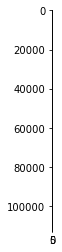

In [26]:
sp.imshow(lda_image)

In [27]:
lda_image.shape

(111104, 10)

In [28]:
lda=np.reshape(lda_image,(217,512,lda_image.shape[-1]))

In [29]:
lda.shape

(217, 512, 10)

ImageView object:
  Display bands       :  [0, 5.0, 9]
  Interpolation       :  <default>
  RGB data limits     :
    R: [-5.553265365237648, 1.662963003488825]
    G: [-13.563483513281652, 11.894903203705585]
    B: [-12.924930581384167, 11.93342935617251]

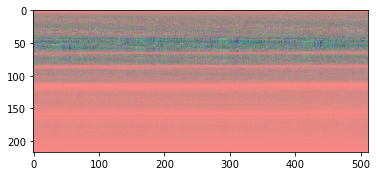

In [30]:
sp.imshow(lda)

### 3. Independent Component Analysis (ICA) 

In [31]:
''' Independent Component Analysis (ICA) is a machine learning technique to separate independent sources from a mixed signal.
Unlike principal component analysis which focuses on maximizing the variance of the data points, the independent component 
analysis focuses on independence, i.e. independent components '''
# https://media.geeksforgeeks.org/wp-content/uploads/20190521012201/ica.jpg

' Independent Component Analysis (ICA) is a machine learning technique to separate independent sources from a mixed signal.\nUnlike principal component analysis which focuses on maximizing the variance of the data points, the independent component \nanalysis focuses on independence, i.e. independent components '

In [32]:
from sklearn.decomposition import FastICA

In [33]:
ica_pipeline = Pipeline([('scaling', StandardScaler()), ('ica', FastICA(n_components=10))])
ica_image = ica_pipeline.fit_transform(flattened_image,flattened_ground)

ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [-0.036839788588715276, 0.03585131422137029]
    G: [-0.036839788588715276, 0.03585131422137029]
    B: [-0.036839788588715276, 0.03585131422137029]

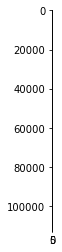

In [34]:
sp.imshow(ica_image)

In [35]:
ica_image.shape

(111104, 10)

In [36]:
ica=np.reshape(ica_image,(217,512,ica_image.shape[-1]))

In [37]:
ica.shape

(217, 512, 10)

ImageView object:
  Display bands       :  [0, 5.0, 9]
  Interpolation       :  <default>
  RGB data limits     :
    R: [-0.03447675819201153, 0.030829729279452153]
    G: [-0.03366911339999471, 0.030189646370204305]
    B: [-0.032010808608867194, 0.03524360329799926]

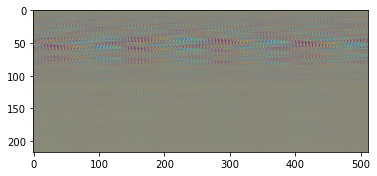

In [38]:
sp.imshow(ica)

In [39]:
norm_flattened = StandardScaler().fit_transform(flattened_image)

In [40]:
def flatten(X):
    if len(X.shape) <= 2:
        X = X
    else:
        X = np.reshape(X,(-1,X.shape[-1]))
    return X

In [41]:
def standard(X):
    from sklearn.preprocessing import StandardScaler
    return StandardScaler().fit_transform(flatten(X))

In [42]:
def unflatten(X,size):
    return np.reshape(X,(size,-1,X.shape[-1]))


In [43]:
class VarianceScorer:
    def __init__(self,X_perfect):
        self._original_variance = np.var(standard(X_perfect),axis = 0)
        self._original = flatten(X_perfect)
    
    def score(self,X):
        current_variance = np.var(flatten(X),axis = 0)
        return (sum(current_variance) / sum(self._original_variance))

In [44]:
def neighbour_score(X,mode="prepend"):
    d1 = np.linalg.norm(np.diff(X,axis = 0,prepend = 0),axis = -1)
    d2 = np.linalg.norm(np.flip(np.diff(np.flip(X,axis=0),axis = 0,prepend = 0),axis=0),axis=-1)
    d3 = np.linalg.norm(np.diff(X,axis = 1,prepend = 0),axis=-1)
    d4 = np.linalg.norm(np.flip(np.diff(np.flip(X,axis=1),axis = 1,prepend = 0),axis=1),axis=-1)
    return np.dstack([d1,d2,d3,d4])

In [45]:
class NeighbourhoodScorer:
    def __init__(self,X_perfect):
        self._original_neighbourhood = self._neighbour_score(X_perfect)
        self._original = flatten(X_perfect)
        
    def _neighbour_score(self,X,mode="wrap"):
        if mode == "prepend":
            # Results in ~0.99699-0.99853 for num_components~50-75
            d1 = np.linalg.norm(np.diff(X,axis = 0,prepend = 0),axis = -1)
            d2 = np.linalg.norm(np.flip(np.diff(np.flip(X,axis=0),axis = 0,prepend = 0),axis=0),axis=-1)
            d3 = np.linalg.norm(np.diff(X,axis = 1,prepend = 0),axis=-1)
            d4 = np.linalg.norm(np.flip(np.diff(np.flip(X,axis=1),axis = 1,prepend = 0),axis=1),axis=-1)
        elif mode == "wrap":
            # Results in ~0.99695-0.99852 for num_component~50-75
            d1 = np.linalg.norm(X - np.roll(X,shift=1,axis=0),axis = -1)
            d2 = np.linalg.norm(X - np.roll(X,shift=-1,axis=0),axis = -1)
            d3 = np.linalg.norm(X - np.roll(X,shift=1,axis=1),axis = -1)
            d4 = np.linalg.norm(X - np.roll(X,shift=-1,axis=1),axis = -1)
        return np.dstack([d1,d2,d3,d4])
    
    def score(self,X):
        current_mat = self._neighbour_score(X)
        return 1/(1+np.linalg.norm(current_mat - self._original_neighbourhood)/(current_mat.shape[0]*current_mat.shape[1]))
    
    def score1(self,X):
        current_mat = self._neighbour_score(X)
        scale = np.mean(current_mat,axis=(0,1)) / np.mean(self._original_neighbourhood,axis=(0,1))
        bias = np.mean(self._original_neighbourhood - (current_mat/scale))
        return 1/(1+np.linalg.norm((current_mat/scale) + bias - self._original_neighbourhood)/(current_mat.shape[0]*current_mat.shape[1]))

### Performance

In [46]:
Scorer = VarianceScorer(salinas)
pca_vs=Scorer.score(pca_image)
pca_vs

0.38332686686077305

In [47]:
Scorer = VarianceScorer(salinas)
lda_vs=Scorer.score(lda_image)
lda_vs

0.020845525195693822

In [48]:
Scorer = VarianceScorer(salinas)
ica_vs=Scorer.score(ica_image)
ica_vs

1.7579250072004365e-07

### Time consumption  

In [49]:
%timeit Scorer.score(pca_image)

20.6 ms ± 174 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [50]:
%timeit Scorer.score(lda_image)

20.3 ms ± 209 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [51]:
%timeit Scorer.score(ica_image)

13.2 ms ± 449 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [52]:
standard(salinas).shape

(44268, 512)

In [53]:
salinas=salinas.reshape(217,512,204)

In [54]:
standard(salinas).shape

(111104, 204)

### Performance After Error Rate reduction

In [55]:
Scorer1 = NeighbourhoodScorer(unflatten(standard(salinas),217))
pca_ns=Scorer1.score1(unflatten(pca_image,217))
pca_ns

0.9934177867007128

In [56]:
Scorer1 = NeighbourhoodScorer(unflatten(standard(salinas),217))
lda_ns=Scorer1.score1(unflatten(lda_image,217))
lda_ns

0.9814262034541008

In [57]:
Scorer1 = NeighbourhoodScorer(unflatten(standard(salinas),217))
ica_ns=Scorer1.score1(unflatten(ica_image,217))
ica_ns

0.9867109480666817

### Time consumption  After Error Rate reduction

In [58]:
%timeit Scorer1.score1(unflatten(pca_image,217))

146 ms ± 5.84 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [59]:
%timeit Scorer1.score1(unflatten(lda_image,217))

142 ms ± 4.73 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [60]:
%timeit Scorer1.score1(unflatten(ica_image,217))

122 ms ± 4.78 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


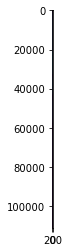

In [61]:
plt.imshow(flattened_image)

#### variance

In [62]:
#variance scores 
print("PCA Variance Score:",pca_vs*100)
print("LDA Variance Score:",lda_vs*100)
print("ICA Variance Score:",ica_vs*100)



PCA Variance Score: 38.3326866860773
LDA Variance Score: 2.084552519569382
ICA Variance Score: 1.7579250072004366e-05


#### Neighbour hood

In [63]:
#Neighbour hood scores
print("PCA NeighbourHood Score:",pca_ns*100)
print("LDA NeighbourHood Score:",lda_ns*100)
print("ICA NeighbourHood Score:",ica_ns*100)



PCA NeighbourHood Score: 99.34177867007128
LDA NeighbourHood Score: 98.14262034541008
ICA NeighbourHood Score: 98.67109480666817


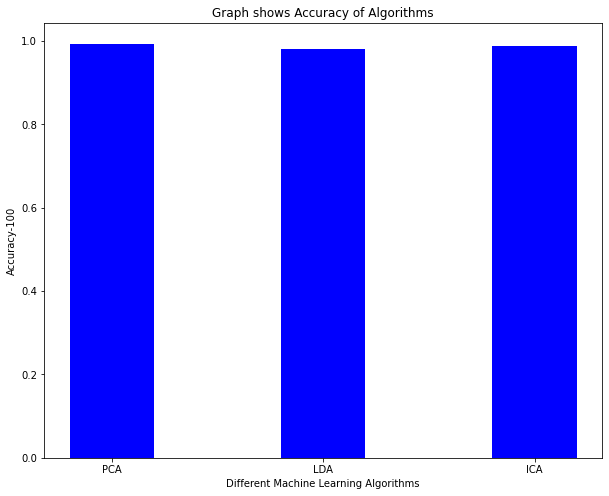

In [64]:
#NeighbourHood Scores are much better than Variance Scores

# creating the dataset
data = {'PCA':pca_ns, 'LDA':lda_ns, 'ICA':ica_ns}

courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 8))

# creating the bar plot
plt.bar(courses, values, color ='blue',width = 0.4)

plt.xlabel("Different Machine Learning Algorithms")
plt.ylabel("Accuracy-100")
plt.title("Graph shows Accuracy of Algorithms")
plt.show()


In [65]:
# From Above graph we came conclude that 
#  PCA is efficient on Indian Pines Dataset